In [1]:
import os
import PIL
import shutil
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, save_model

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total no. of images: ", image_count)

228813984/228813984 [==============================] - 2s 0us/step
Total no. of images:  3670


In [3]:
batch_size = 32
img_height = 180
img_width = 180


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


class_names = train_ds.class_names
print("Class Names :", class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Class Names : ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [4]:
train_ds = train_ds.cache().shuffle(1000)
val_ds = val_ds.cache()

num_classes = len(class_names) # 5

In [5]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


print(model.summary())

print("Model Training....")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [6]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

print("Training Complete!")

Epoch 1/10
92/92 [==============================] - 132s 1s/step - loss: 1.2644 - accuracy: 0.4656 - val_loss: 1.0537 - val_accuracy: 0.5831
Epoch 2/10
92/92 [==============================] - 115s 1s/step - loss: 0.9400 - accuracy: 0.6383 - val_loss: 0.9134 - val_accuracy: 0.6349
Epoch 3/10
92/92 [==============================] - 117s 1s/step - loss: 0.7734 - accuracy: 0.7146 - val_loss: 0.9278 - val_accuracy: 0.6213
Epoch 4/10
92/92 [==============================] - 118s 1s/step - loss: 0.5581 - accuracy: 0.7960 - val_loss: 0.9232 - val_accuracy: 0.6567
Epoch 5/10
92/92 [==============================] - 117s 1s/step - loss: 0.3347 - accuracy: 0.8845 - val_loss: 1.2788 - val_accuracy: 0.6322
Epoch 6/10
92/92 [==============================] - 117s 1s/step - loss: 0.1989 - accuracy: 0.9370 - val_loss: 1.3770 - val_accuracy: 0.6199
Epoch 7/10
92/92 [==============================] - 118s 1s/step - loss: 0.1178 - accuracy: 0.9649 - val_loss: 1.6261 - val_accuracy: 0.5872
Epoch 8/10
92

Text(0.5, 1.0, 'Training and Validation Accuracy')

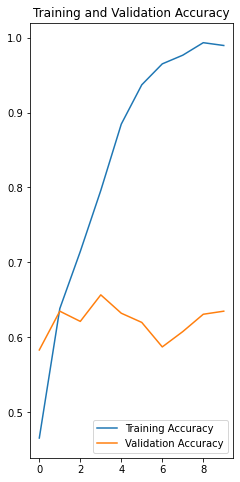

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

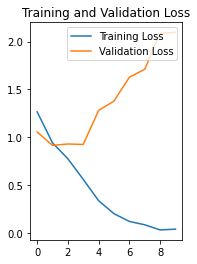

In [8]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
save_model(model, 'flower_model_trained.hdf5')
print("Model Saved")

Model Saved
